Integrantes: Vitor Risso Parisi - Iago Vinicius Ribeiro Siqueira - Vinicius Daniel Dalarmelina Moreira


Tema: Taxa de aprovação dos alunos

Problema: Quais atributos influenciam na nota final dos alunos, afim de incentivar uma melhora.


Estes dados abordam o aproveitamento dos alunos do ensino secundário de duas escolas portuguesas. Os atributos de dados incluem notas dos alunos, características demográficas, sociais e relacionadas à escola) e foram coletados por meio de relatórios e questionários escolares. São fornecidos dois conjuntos de dados relativos ao desempenho em duas disciplinas distintas: Matemática (mat) e Língua Portuguesa (por). Em [Cortez e Silva, 2008], os dois conjuntos de dados foram modelados sob classificação binária / cinco níveis e tarefas de regressão. 




In [36]:
# Importanto as bibliotecas Python necessarias ao experimento
# Manipulacao matricial e visualizacao grafica
#--------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregando a base de dados em um objeto DataFrame pertencente a biblioteca Pandas
# O arquivo .csv esta disponivel para download no Google Classroom. 
localDataEndereco = "/content/student.csv" 
df = pd.read_csv(localDataEndereco)

O primeiro passo de qualquer EDA é saber a dimensão da base:

In [37]:
# Exibindo  dimensao da base de dados
print("Dimensão dos dados:")
print("Linhas (Instâncias):{}".format(df.shape[0]))
print("Colunas (Atributos):{}".format(df.shape[1]))

Dimensão dos dados:
Linhas (Instâncias):649
Colunas (Atributos):33


Foi demonstrado as cinco primeiras instâncias da base de dados para a inspeção e obtenção de conhecimento sobre os dados.

In [38]:
# Apresenta, de forma completa, as cinco primeiras instâncias da base de dados.
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


# Transformação e criação de Features


Foi realizado transformaçoes de variáveis textuais binárias para números binários.

In [39]:
df["schoolsup"]=df["schoolsup"].map({'no':0,'yes':1}).astype(int)
df["famsup"]=df["famsup"].map({'no':0,'yes':1}).astype(int)
df["paid"]=df["paid"].map({'no':0,'yes':1}).astype(int)
df["activities"]=df["activities"].map({'no':0,'yes':1}).astype(int)
df["nursery"]=df["nursery"].map({'no':0,'yes':1}).astype(int)
df["higher"]=df["higher"].map({'no':0,'yes':1}).astype(int)
df["internet"]=df["internet"].map({'no':0,'yes':1}).astype(int)
df["romantic"]=df["romantic"].map({'no':0,'yes':1}).astype(int)
df["famsize"]=df["famsize"].map({'LE3':0,'GT3':1}).astype(int)
df["Pstatus"]=df["Pstatus"].map({'A':0,'T':1}).astype(int)

#df["address"]=df["address"].map({'U':0,'R':1}).astype(int)
#df["guardian"]=df["guardian"].map({'mother':0,'father':1, 'other':2}).astype(int)
#df["Mjob"]=df["Mjob"].map({'at_home':0,'health':1, 'services':2, 'teacher':3, 'other': 4}).astype(int)
#df["Fjob"]=df["Fjob"].map({'at_home':0,'health':1, 'services':2, 'teacher':3, 'other': 4}).astype(int)
#df["reason"]=df["reason"].map({'home':0,'course':1, 'reputation':2,'other': 3}).astype(int)
#df["sex"]=df["sex"].map({'F':0,'M':1}).astype(int)
## Apresentando novamente os dados com as coluna alteradas :

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


Foi adicionado uma featuares artificial denominada "mediaFinal" que cálcula a média das notas G1, G2 e G3 de cada estudante para a criação de uma nova features artificial denominada "target" onde mediaFinal >= 12 é 1 e < 12 é 0.



In [40]:
notasEntrada = df.drop(['school', 'sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences'], axis=1)
dadosEntrada = df
dadosEntrada['mediaFinal'] = notasEntrada.mean(axis=1)
#dadosEntrada['mediana'] = notasEntrada.median(axis=1)
#dadosEntrada['mediaHarmonica'] = hmean(notasEntrada.iloc[:, 0:2], axis=1)
#dadosEntrada['mediaGeometrica'] = gmean(notasEntrada.iloc[:, 0:2], axis=1) 
#dadosEntrada['desvioPadrao'] = notasEntrada.std(axis=1)
#dadosEntrada['variancia'] = notasEntrada.var(axis=1)
#dadosEntrada['coeficienteVariacao'] = 100 * notasEntrada.std(axis=1)/notasEntrada.mean(axis=1)
#dadosEntrada['curtose'] = notasEntrada.kurtosis(axis=1)
#dadosEntrada['assimetria'] = notasEntrada.skew(axis=1)
dadosEntrada.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mediaFinal
0,GP,F,18,U,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,12.333333


Criando a feature artificial target para determinar se o aluno foi aprovado/reprovado.

In [41]:
dadosEntrada['target'] = 0
for i in range(649):
  if (dadosEntrada['mediaFinal'][i]>=12):
      dadosEntrada['target'][i] = 1
  else:
      dadosEntrada['target'][i] = 0
dadosEntrada.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mediaFinal,target
0,GP,F,18,U,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,7.333333,0
1,GP,F,17,U,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,10.333333,0
2,GP,F,15,U,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,12.333333,1
3,GP,F,15,U,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,14.000000,1
4,GP,F,16,U,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,12.333333,1


Foi realizado uma transformação de variáveis categóricas em variáveis numéricas para aulixiar na manipulação dos dados.

In [42]:
#pd.get_dummies(df, columns=["address"]).head()
#pd.get_dummies(df, columns=["guardian"]).head()
#pd.get_dummies(df, columns=["Mjob"]).head()
#pd.get_dummies(df, columns=["Fjob"]).head()
#pd.get_dummies(df, columns=["reason"]).head()
#dadosEntrada = pd.get_dummies(dadosEntrada, columns=["sex"]).head()
df_dum = pd.get_dummies(dadosEntrada, columns=["address", "guardian","Mjob","Fjob","reason","sex"], prefix=["address", "guardian","Mjob","Fjob","reason","sex"])
#df["address"] = df["address"].astype('category')
#df.dtypes
#df["address_cat"] = df["address"].cat.codes
df_dum.head()

,school,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mediaFinal,target,address_R,address_U,guardian_father,guardian_mother,guardian_other,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,sex_F,sex_M
0,GP,18,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,7.333333,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,GP,17,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,10.333333,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,GP,15,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,12.333333,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,GP,15,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,14.000000,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,GP,16,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,12.333333,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


# Correlação das variáveis / Mapa de calor

Foi calculado o coeficiente de correlação entre todas as variáveis para visualizar quais váriaveis tem correlação positiva na coluna "mediaFinal".

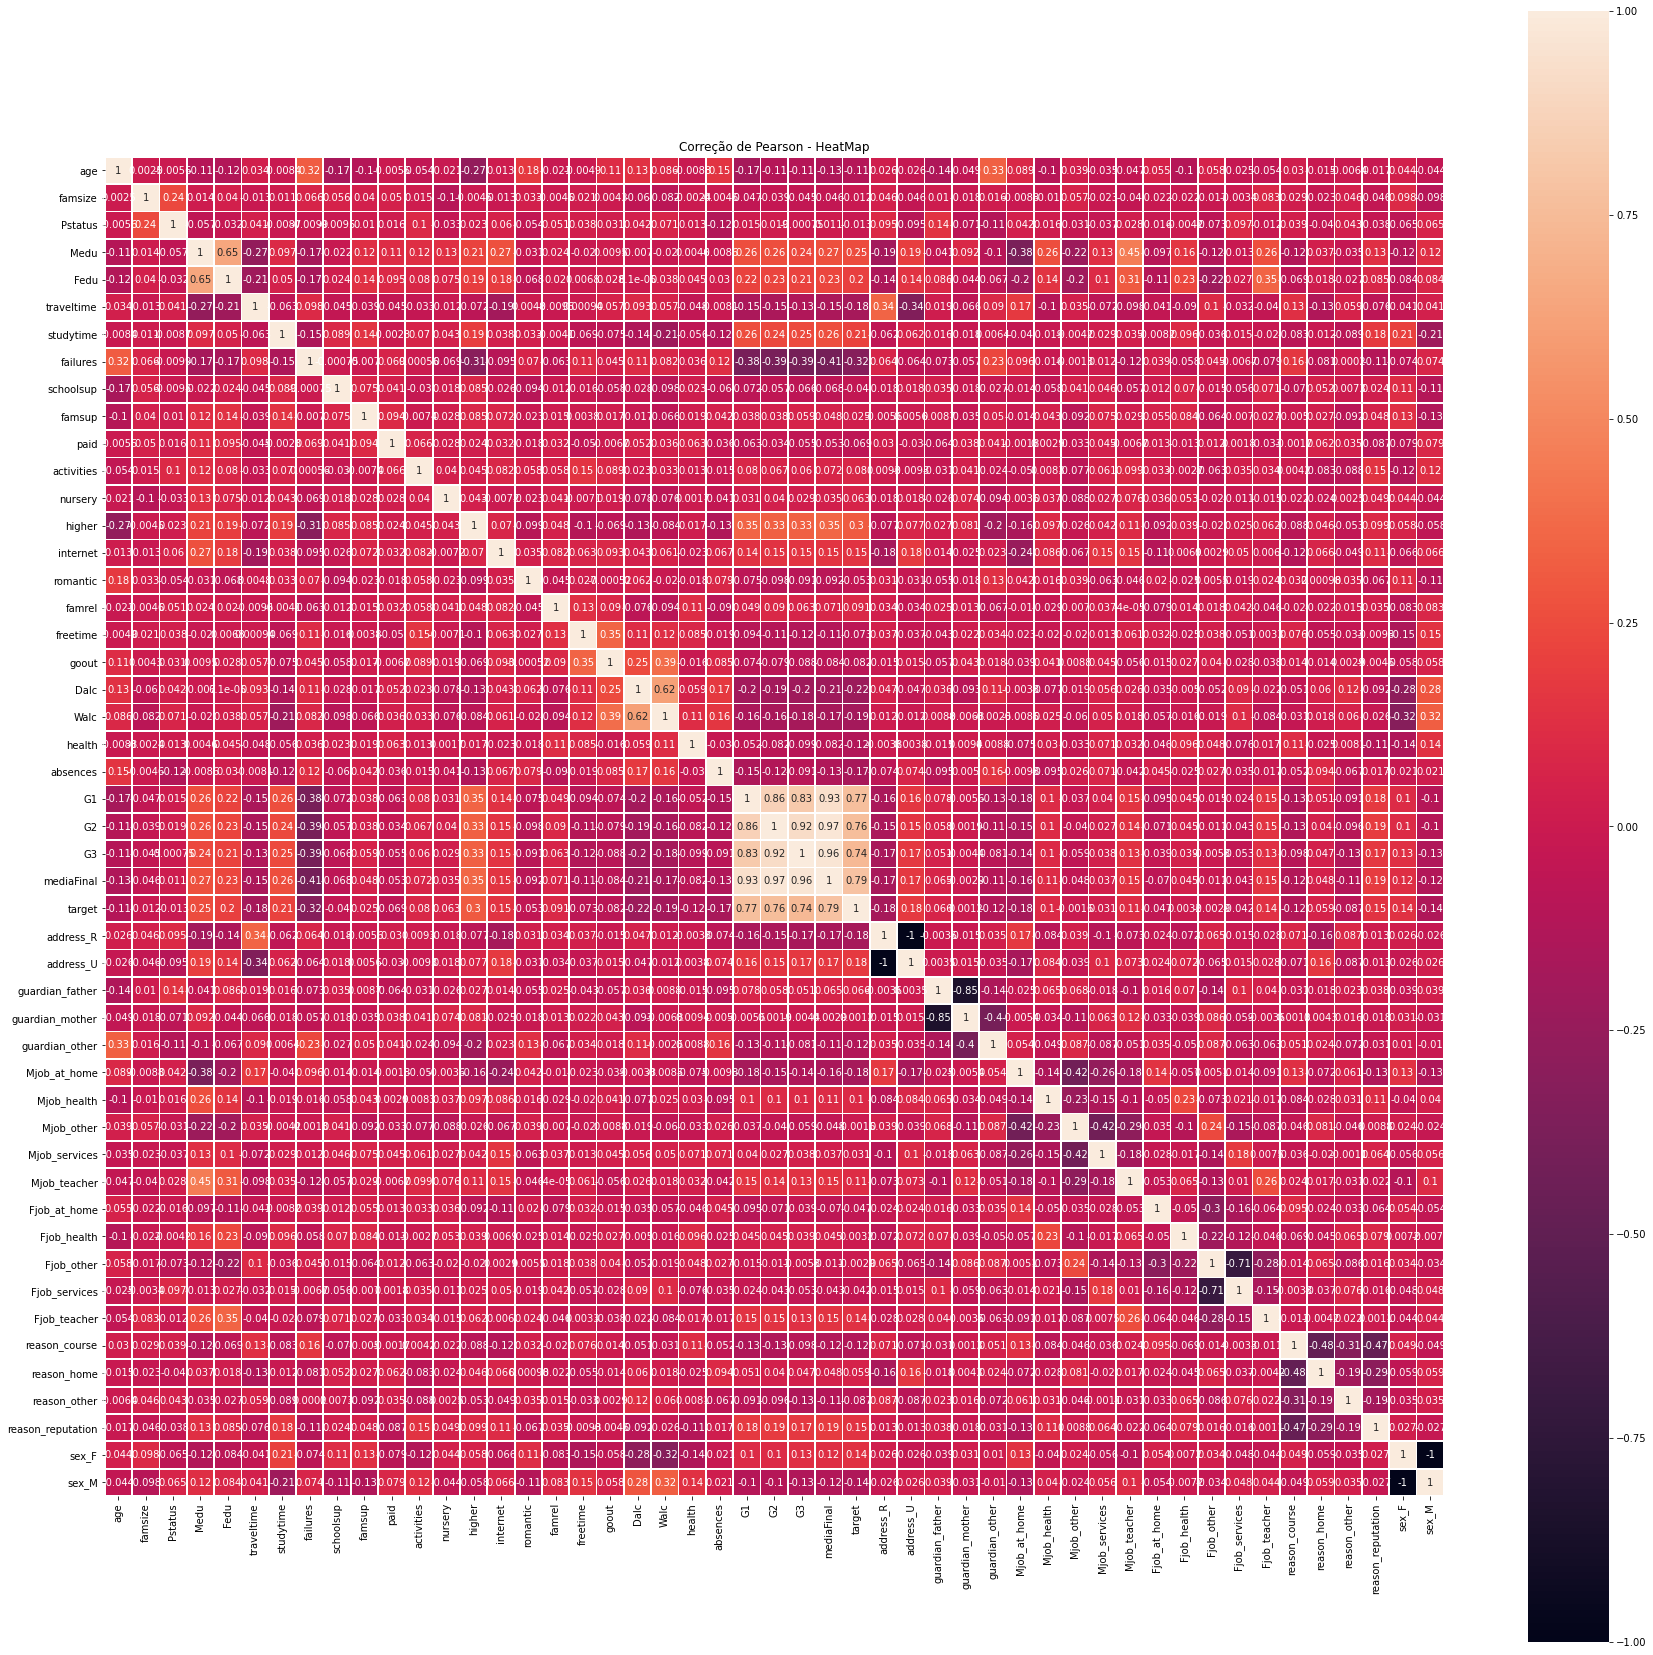

In [43]:
#Calculando o coeificiente de correlação entre algumas variáveis da base de dados;

df_dum.corr()
#Apresentando a correlação através de um mapa de calor.
f, ax = plt.subplots(figsize=(30, 30))
plt.title('Correção de Pearson - HeatMap')

sns.heatmap(df_dum.corr(),linewidths=0.7,vmax=1.0, square=True, annot=True)


* Medu 0.25
* Fedu 0.20
* traveltime -0.18
* studytime 0.21
* failures -0.32
* higher 0.30
* internet 0.15
* dalc -0.22
* walc -0.19
* absences -0.17
* address_R -0.18
* address_U 0.18
* mjob_at_home -0.18
* fjob_teacher 0.14
* reason_reputation 0.15


# Features com correlação >0,15 e <-0,15


Divisão das variáveis de entrada e target e train_test_split.



In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


saidaDesejada = df_dum['target']


#features correlacao >0.15 e <-0.15
dadosEntrada04=df_dum.drop(['age','sex_F','sex_M','target','mediaFinal','nursery','school','G1','G2','G3','famsize','Pstatus','schoolsup','Mjob_health','Mjob_teacher','famsup','paid','activities','romantic','famrel','freetime','goout','health','guardian_father','guardian_mother','guardian_other','Mjob_other','Mjob_services','Fjob_at_home','Fjob_health','Fjob_other','Fjob_services','reason_course','reason_home','reason_other'], axis=1)
dadosEntrada05=df_dum.drop(['age','sex_F','sex_M','target','mediaFinal','nursery','school','G2','G3','famsize','Pstatus','schoolsup','Mjob_health','Mjob_teacher','famsup','paid','activities','romantic','famrel','freetime','goout','health','guardian_father','guardian_mother','guardian_other','Mjob_other','Mjob_services','Fjob_at_home','Fjob_health','Fjob_other','Fjob_services','reason_course','reason_home','reason_other'], axis=1)

dadosEntrada_train, dadosEntrada_test, saidaDesejada_train, saidaDesejada_test = train_test_split(dadosEntrada05, saidaDesejada, test_size=0.3)
dadosEntrada05.head()

,Medu,Fedu,traveltime,studytime,failures,higher,internet,Dalc,Walc,absences,G1,address_R,address_U,Mjob_at_home,Fjob_teacher,reason_reputation
0,4,4,2,2,0,1,0,1,1,4,0,0,1,1,1,0
1,1,1,1,2,0,1,1,1,1,2,9,0,1,1,0,0
2,1,1,1,2,0,1,1,2,3,6,12,0,1,1,0,0
3,4,2,1,3,0,1,1,1,1,0,14,0,1,0,0,0
4,3,3,1,2,0,1,0,1,2,0,11,0,1,0,0,0


KNN



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score

knn = KNeighborsClassifier(n_neighbors=24, metric='euclidean')
knn.fit(dadosEntrada_train, saidaDesejada_train)
classificacaoKnn = knn.predict(dadosEntrada_test)

k_list = list(range(1,31))
p_list = [1,2]
w_list = ['uniform','distance']
parametros = dict(n_neighbors=k_list, weights=w_list, p=p_list)
grid = GridSearchCV(knn, parametros, cv=5,  scoring='accuracy')
grid.fit(dadosEntrada_train, saidaDesejada_train)
print(f"Melhores parametros {grid.best_estimator_}")

Melhores parametros KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='uniform')


------------------------------
------------------------------
Acurácia:  0.8871794871794871
Recall:  0.8409090909090909
Precision:  0.9024390243902439
f1 Score:  0.8705882352941177
------------------------------
------------------------------
--- Matriz de Confusão ---


,pred_neg,pred_pos
neg,99,8
pos,14,74


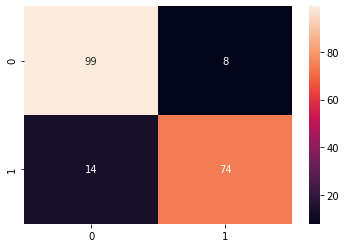

In [46]:
knn = KNeighborsClassifier( metric='euclidean',n_neighbors=10 ,weights='distance')
knn.fit(dadosEntrada_train, saidaDesejada_train)
classificacaoKnn = knn.predict(dadosEntrada_test)

#Calculando as metricas: Acurácia, Recall, Precision, f1 Score
accuracy_test = accuracy_score(saidaDesejada_test, classificacaoKnn)
recall_test = recall_score(saidaDesejada_test, classificacaoKnn)
precision_test = precision_score(saidaDesejada_test, classificacaoKnn)
f1_test = f1_score(saidaDesejada_test, classificacaoKnn)
print('------------------------------')
print('------------------------------')
print('Acurácia: ', accuracy_test)
print('Recall: ', recall_test)
print('Precision: ', precision_test)
print('f1 Score: ', f1_test)

#Gera a matriz de confusão no formato grafico
confusionMatrix2 = confusion_matrix(saidaDesejada_test,classificacaoKnn)
sns.heatmap(confusionMatrix2,annot=True,fmt="d")

print('------------------------------')
print('------------------------------')
print('--- Matriz de Confusão ---')
pd.DataFrame(confusion_matrix(saidaDesejada_test, classificacaoKnn),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

RANDOM FOREST

------------------------------
------------------------------
Acurácia:  0.8974358974358975
Recall:  0.8522727272727273
Precision:  0.9146341463414634
f1 Score:  0.8823529411764706
------------------------------
------------------------------
--- Matriz de Confusão ---


,pred_neg,pred_pos
neg,100,7
pos,13,75


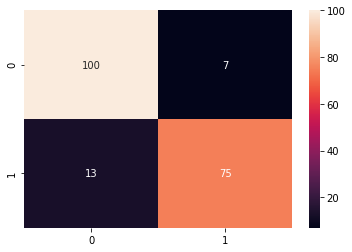

In [47]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier
instanciaRandonForest=RandomForestClassifier(max_depth=6,n_estimators=500, random_state = 11850)
instanciaRandonForest.fit(dadosEntrada_train,saidaDesejada_train)
classificacaoRandomForest_BC=instanciaRandonForest.predict(dadosEntrada_test)

#Calculando as metricas: Acurácia, Recall, Precision, f1 Score
accuracy_test = accuracy_score(saidaDesejada_test, classificacaoRandomForest_BC)
recall_test = recall_score(saidaDesejada_test, classificacaoRandomForest_BC)
precision_test = precision_score(saidaDesejada_test, classificacaoRandomForest_BC)
f1_test = f1_score(saidaDesejada_test, classificacaoRandomForest_BC)
print('------------------------------')
print('------------------------------')
print('Acurácia: ', accuracy_test)
print('Recall: ', recall_test)
print('Precision: ', precision_test)
print('f1 Score: ', f1_test)

#Gera a matriz de confusão no formato grafico
confusionMatrix2 = confusion_matrix(saidaDesejada_test,classificacaoRandomForest_BC)
sns.heatmap(confusionMatrix2,annot=True,fmt="d")

print('------------------------------')
print('------------------------------')
print('--- Matriz de Confusão ---')
pd.DataFrame(confusion_matrix(saidaDesejada_test, classificacaoRandomForest_BC),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

# Features com correlaçao >0,15 e <-0,15 e que possam ser incentivadas 


Divisão das variáveis de entrada e target e train_test_split.



In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


saidaDesejada = df_dum['target']

#features correlacao >0.15 e <-0.15 influenciaveis 
dadosEntrada11=df_dum.drop(['age','target','mediaFinal','nursery','address_R','address_U', 'Mjob_other','sex_F','sex_M','school','G1','G2','G3','famsize','Pstatus','Medu','Fedu','failures','schoolsup','famsup','paid','activities','romantic','famrel','freetime','goout','health','guardian_father','guardian_mother','guardian_other','Mjob_services','Mjob_teacher','Mjob_health','Mjob_at_home','Fjob_at_home','Fjob_health','Fjob_other','Fjob_services','Fjob_teacher','reason_course','reason_home','reason_other','reason_reputation'], axis=1)
dadosEntrada12=df_dum.drop(['age','target','mediaFinal','nursery','address_R','address_U', 'Mjob_other','sex_F','sex_M','school','G2','G3','famsize','Pstatus','Medu','Fedu','failures','schoolsup','famsup','paid','activities','romantic','famrel','freetime','goout','health','guardian_father','guardian_mother','guardian_other','Mjob_services','Mjob_teacher','Mjob_health','Mjob_at_home','Fjob_at_home','Fjob_health','Fjob_other','Fjob_services','Fjob_teacher','reason_course','reason_home','reason_other','reason_reputation'], axis=1)


dadosEntrada_train, dadosEntrada_test, saidaDesejada_train, saidaDesejada_test = train_test_split(dadosEntrada12, saidaDesejada, test_size=0.3)
dadosEntrada12.head()

,traveltime,studytime,higher,internet,Dalc,Walc,absences,G1
0,2,2,1,0,1,1,4,0
1,1,2,1,1,1,1,2,9
2,1,2,1,1,2,3,6,12
3,1,3,1,1,1,1,0,14
4,1,2,1,0,1,2,0,11


KNN



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(dadosEntrada_train, saidaDesejada_train)
classificacaoKnn = knn.predict(dadosEntrada_test)

k_list = list(range(1,31))
p_list = [1,2]
w_list = ['uniform','distance']

parametros = dict(n_neighbors=k_list, weights=w_list, p=p_list)
grid = GridSearchCV(knn, parametros, cv=5,  scoring='accuracy')
grid.fit(dadosEntrada_train, saidaDesejada_train)
print(f"Melhores parametros {grid.best_estimator_}")

Melhores parametros KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=1,
                     weights='uniform')


------------------------------
------------------------------
Acurácia:  0.8974358974358975
Recall:  0.8484848484848485
Precision:  0.9438202247191011
f1 Score:  0.8936170212765958
------------------------------
------------------------------
--- Matriz de Confusão ---


,pred_neg,pred_pos
neg,91,5
pos,15,84


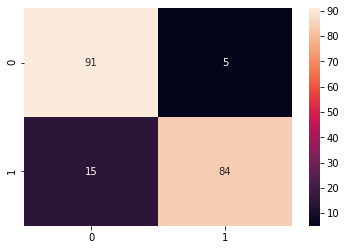

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
knn = KNeighborsClassifier( n_neighbors=21, metric='minkowski',weights='distance' )
knn.fit(dadosEntrada_train, saidaDesejada_train)
classificacaoKnn = knn.predict(dadosEntrada_test)

#Calculando as metricas: Acurácia, Recall, Precision, f1 Score
accuracy_test = accuracy_score(saidaDesejada_test, classificacaoKnn)
recall_test = recall_score(saidaDesejada_test, classificacaoKnn)
precision_test = precision_score(saidaDesejada_test, classificacaoKnn)
f1_test = f1_score(saidaDesejada_test, classificacaoKnn)
print('------------------------------')
print('------------------------------')
print('Acurácia: ', accuracy_test)
print('Recall: ', recall_test)
print('Precision: ', precision_test)
print('f1 Score: ', f1_test)

#Gera a matriz de confusão no formato grafico
confusionMatrix2 = confusion_matrix(saidaDesejada_test,classificacaoKnn)
sns.heatmap(confusionMatrix2,annot=True,fmt="d")

print('------------------------------')
print('------------------------------')
print('--- Matriz de Confusão ---')
pd.DataFrame(confusion_matrix(saidaDesejada_test, classificacaoKnn),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

RANDOM FOREST

------------------------------
------------------------------
Acurácia:  0.9076923076923077
Recall:  0.8787878787878788
Precision:  0.9354838709677419
f1 Score:  0.90625
------------------------------
------------------------------
--- Matriz de Confusão ---


,pred_neg,pred_pos
neg,90,6
pos,12,87


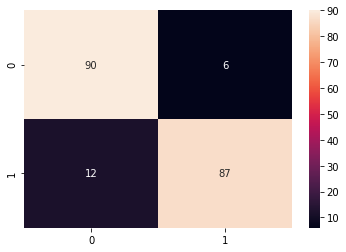

In [51]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier
instanciaRandonForest=RandomForestClassifier(max_depth=6,n_estimators=500, random_state = 11850)
instanciaRandonForest.fit(dadosEntrada_train,saidaDesejada_train)
classificacaoRandomForest_BC=instanciaRandonForest.predict(dadosEntrada_test)

#Calculando as metricas: Acurácia, Recall, Precision, f1 Score
accuracy_test = accuracy_score(saidaDesejada_test, classificacaoRandomForest_BC)
recall_test = recall_score(saidaDesejada_test, classificacaoRandomForest_BC)
precision_test = precision_score(saidaDesejada_test, classificacaoRandomForest_BC)
f1_test = f1_score(saidaDesejada_test, classificacaoRandomForest_BC)
print('------------------------------')
print('------------------------------')
print('Acurácia: ', accuracy_test)
print('Recall: ', recall_test)
print('Precision: ', precision_test)
print('f1 Score: ', f1_test)

#Gera a matriz de confusão no formato grafico
confusionMatrix2 = confusion_matrix(saidaDesejada_test,classificacaoRandomForest_BC)
sns.heatmap(confusionMatrix2,annot=True,fmt="d")

print('------------------------------')
print('------------------------------')
print('--- Matriz de Confusão ---')
pd.DataFrame(confusion_matrix(saidaDesejada_test, classificacaoRandomForest_BC),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])